In [2]:
# Import necessary libraries
import os
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import mmread
from scipy.sparse import csr_matrix, lil_matrix
from pathlib import Path

inputfile="../data/Melanoma/GSE72056_melanoma_single_cell_revised_v2.txt"
outputfile="../out/Melanoma"

HVF = True
TEST = False 
    
TEST_genes = 800
TEST_samples = 10000

k = 15

# Load Dataset

In [3]:
se = pd.read_csv(inputfile, index_col=0, sep="\t")[3:]
meta = pd.read_csv(inputfile, index_col=0, sep="\t").iloc[:3]
se=csr_matrix(se.values)
se = se[se.getnnz(1) > 0][:, se.getnnz(0) > 0]

if TEST:
    tgenes = min(TEST_genes, se.shape[1])
    tsamples = min(TEST_samples, se.shape[0])
    se.resize((tsamples, tgenes))
    se = se[se.getnnz(1) > 0][:, se.getnnz(0) > 0]

adata = sc.AnnData(se)
#sc.pp.normalize_total(adata, target_sum=1e6)
#sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=False)
sc.pp.highly_variable_genes(adata)

if HVF:
    adata = adata[:, adata.var.highly_variable]
    adata = adata[adata.X.getnnz(1) > 0][:, adata.X.getnnz(0) > 0]

sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/matteo/.conda/envs/pyaa/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


# Visualize data

Saving Image --- ../out/Melanoma/PCA.png


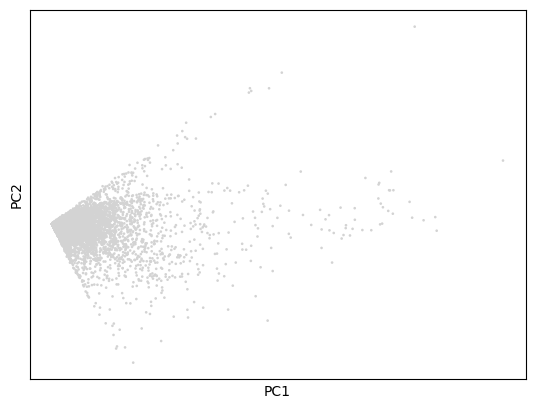

In [3]:
# PCA plot
imgname = os.path.join(outputfile, "PCA.png")
print(f"Saving Image --- {imgname}")
sc.pl.pca(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/Melanoma/UMAP.png


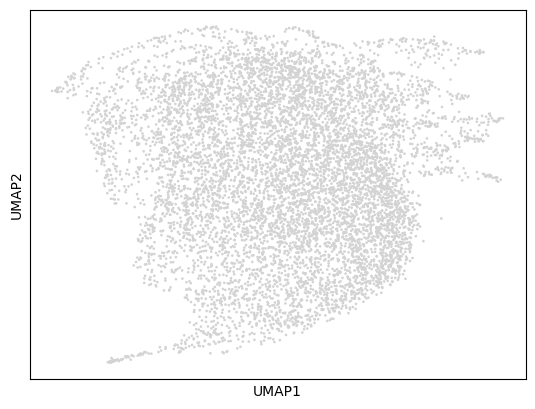

In [4]:
# UMAP plot
imgname = os.path.join(outputfile, "UMAP.png")
print(f"Saving Image --- {imgname}")
sc.pl.umap(adata, save=imgname.split('/')[-1])

Saving Image --- ../out/Melanoma/elbow.pdf


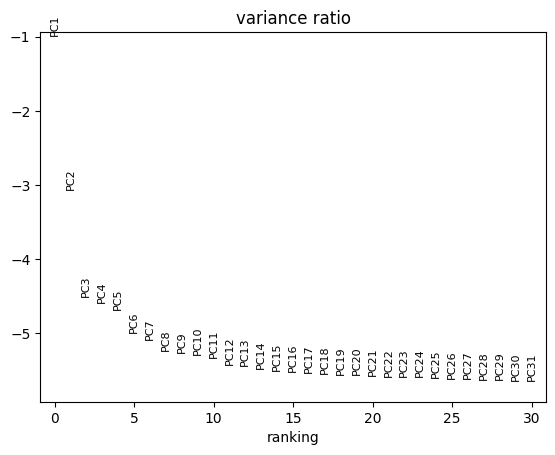

In [5]:
# Elbow plot
imgname = os.path.join(outputfile, "elbow.pdf")
print(f"Saving Image --- {imgname}")
sc.pl.pca_variance_ratio(adata, log=True, save=imgname.split('/')[-1])

# Archetypes

In [6]:
#import archetypes as arch
#from time import time
#
#aa_kwargs = {
#    "n_archetypes": 14,
#    "n_init": 5,
#    "max_iter": 10000,
#    "verbose": True,
#    "tol": 1e-3,
#}
#
#mod0 = arch.AA(**aa_kwargs, algorithm_init="furthest_sum")
#
#t0=time()
#mod0.fit_transform(adata.X.toarray())
#t1=time()
#
#print(f"mod0: {t1-t0:.2f} seconds|RSS: {mod0.rss:.2f}")

Initialization 1/5
    Iteration:     1, RSS: inf


RuntimeError: Maximum number of iterations reached.